In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
%matplotlib inline
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [2]:
path = 'dataset-SpamSMS.csv'
dataset_spam = pd.read_csv(path)
dataset_spam.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [3]:
#print the shape (get the number of rows and columns of the dataset)
dataset_spam.shape

(15698, 2)

In [4]:
#get the column names
dataset_spam.columns

Index(['type', 'text'], dtype='object')

In [5]:
dataset_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15698 entries, 0 to 15697
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    15698 non-null  object
 1   text    15698 non-null  object
dtypes: object(2)
memory usage: 245.4+ KB


In [6]:
#check for duplicates rows and remove or drop them later
dataset_spam.drop_duplicates (inplace= True)

In [7]:
#show the new shape of the data, meaning the new number of rows and columns
dataset_spam.shape

(9882, 2)

In [8]:
#show number of missing data for each column (NAN, NaN, na)
dataset_spam.isnull().sum()

type    0
text    0
dtype: int64

###We are going to use stopwords within the function that we are going to create, and this function will be used to process the text.
###Stopwords in natural language processing are useless words or data

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer()

X = dataset_spam['text']
X_tfidfvect = tfidfVectorizer.fit_transform(X)

In [10]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

X_train_tfidfvect, X_test_tfidfvect, y_train_tfidfvect, y_test_tfidfvect = train_test_split(X_tfidfvect, 
                                                                                            dataset_spam['type'],
                                                                                            stratify = dataset_spam['type'],
                                                                                            test_size=0.20, 
                                                                                            random_state= 0)

#**Algorithms Comparison**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

In [12]:
classification_models = []
classification_models.append(('LOGISTIC', LogisticRegression(solver='liblinear', multi_class='ovr')))
classification_models.append(('NEIGHBOR', KNeighborsClassifier()))
classification_models.append(('TREE', DecisionTreeClassifier()))
classification_models.append(('NAIVEBAYES', MultinomialNB()))
#classification_models.append(('NAIVEBAYES', GaussianNB()))
classification_models.append(('VECTOR', SVC(gamma='auto')))
classification_models.append(('FOREST',RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt', n_jobs=-1, verbose = 1)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent work

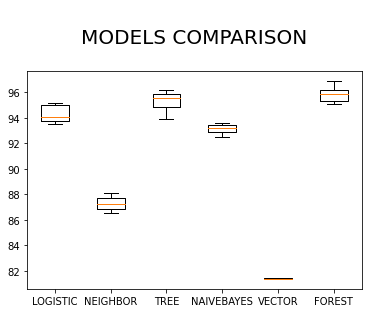

,LOGISTIC,NEIGHBOR,TREE,NAIVEBAYES,VECTOR,FOREST
Accuracy(%),94.269364,87.286429,95.332053,93.130918,81.416828,95.838062
STD,0.652566,0.515731,0.728973,0.400082,0.047551,0.555491


In [13]:
results = []
algorithms = []
cv_results_mean = []
cv_results_std = []
for algorith, model in classification_models:
    kfold = StratifiedKFold(n_splits = 8, random_state = 1, shuffle = True)
    cv_results = (cross_val_score(model, X_train_tfidfvect, y_train_tfidfvect, cv=kfold, scoring='accuracy'))*100
    results.append(cv_results)
    algorithms.append(algorith)
    cv_results_mean.append(cv_results.mean())
    cv_results_std.append(cv_results.std())

Accuracy_chart_data = [cv_results_mean, cv_results_std]
Accuracy_chart = pd.DataFrame(Accuracy_chart_data, columns = algorithms, index = ['Accuracy(%)', 'STD'])
  
plt.boxplot(results, labels = algorithms)
plt.title('\nMODELS COMPARISON\n'.upper(), loc='center', fontsize = 20)
plt.show()

Accuracy_chart

In [14]:
def accuracyscore(X_train, y_train, model, X_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

In [15]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split

dataset_spam = pd.read_csv(path)

X = dataset_spam['text'].values
y = dataset_spam['type'].values

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify = y,
                                                    test_size=0.20, 
                                                    random_state= 0)

# **Training the Logistic Regression algorithm**

In [16]:
from sklearn.pipeline import make_pipeline

In [17]:
from sklearn.metrics import classification_report

In [18]:
#The code below is eliminating stop words.
#tfidfvectorizer = TfidfVectorizer(analyzer='word',stop_words= 'english')


#convert a collection of text to a matrix of words without eliminating stop words
model_LR = make_pipeline(TfidfVectorizer(), 
                      LogisticRegression(solver='liblinear', 
                                         multi_class='ovr'))

Prediction with real SMS

In [19]:
def predict_SMS(sms, model):
    pred = model.predict([sms])
    return pred[0]

In [20]:
#real_sms_prediction = predict_SMS('Your AIB online access is suspended due to unusual activity. To restore access please follow the steps via: https://securemobileaibapp.com', model_LR)
#print(real_sms_prediction)

# **Training the Random Forest Classifier Algorith**

In [21]:
model_RFC = make_pipeline(TfidfVectorizer(), 
                      RandomForestClassifier(random_state = 1, 
                               max_features = 'sqrt',
                               n_jobs=-1, 
                               verbose = 1))

In [22]:
#real_sms_prediction = predict_SMS('Your AIB online access is suspended due to unusual activity. To restore access please follow the steps via: https://securemobileaibapp.com', model_RFC)
#print(real_sms_prediction)

# **Accuracy of the models**

In [24]:
predictions = accuracyscore(X_train, y_train, model_LR, X_test)
print("LOGISTIC REGRESSION accuracy score", accuracy_score(y_test, predictions)*100, '%')

ac_s = accuracyscore(X_train, y_train, model_RFC, X_test)
print("RANDOM FOREST CLASSIFIER accuracy score", accuracy_score(y_test, ac_s)*100, '%')

LOGISTIC REGRESSION accuracy score 96.97452229299363 %


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s


RANDOM FOREST CLASSIFIER accuracy score 98.53503184713375 %


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [25]:
print('CLASSIFICATION REPORT FOR LOGISTIC REGRESSION:\n', classification_report(y_test, predictions))

print('\n\nCLASSIFICATION REPORT FOR RANDOM FOREST:\n', classification_report(y_test, ac_s))

CLASSIFICATION REPORT FOR LOGISTIC REGRESSION:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      2599
        spam       0.98      0.84      0.91       541

    accuracy                           0.97      3140
   macro avg       0.98      0.92      0.94      3140
weighted avg       0.97      0.97      0.97      3140



CLASSIFICATION REPORT FOR RANDOM FOREST:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      2599
        spam       0.98      0.94      0.96       541

    accuracy                           0.99      3140
   macro avg       0.98      0.97      0.97      3140
weighted avg       0.99      0.99      0.99      3140



In [26]:
pred_val_comp = np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1)
pred_val_comp = pd.DataFrame(pred_val_comp, columns = ['Predictions', 'Validation_Set'])
pred_val_comp.head(3)

,Predictions,Validation_Set
0,ham,ham
1,ham,ham
2,ham,ham


In [27]:
pred_val_comp = np.concatenate((ac_s.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1)
pred_val_comp = pd.DataFrame(pred_val_comp, columns = ['Predictions', 'Validation_Set'])
pred_val_comp.head(3)

,Predictions,Validation_Set
0,ham,ham
1,ham,ham
2,ham,ham


In [28]:
"""
plt.figure(figsize=(5,4))
plt.plot(pred_val_comp.Predictions, 'rD')
plt.plot(pred_val_comp.Validation_Set, 'b*')
plt.xlabel('Observations')
plt.ylabel('SMS type')
plt.legend(['Predictions', 'Validations'], loc='best')
a = plt.title('\nPREDICTIONS vs VALIDATIONS\n'.upper(), loc='center', fontsize = 20)
"""

"\nplt.figure(figsize=(5,4))\nplt.plot(pred_val_comp.Predictions, 'rD')\nplt.plot(pred_val_comp.Validation_Set, 'b*')\nplt.xlabel('Observations')\nplt.ylabel('SMS type')\nplt.legend(['Predictions', 'Validations'], loc='best')\na = plt.title('\nPREDICTIONS vs VALIDATIONS\n'.upper(), loc='center', fontsize = 20)\n"

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


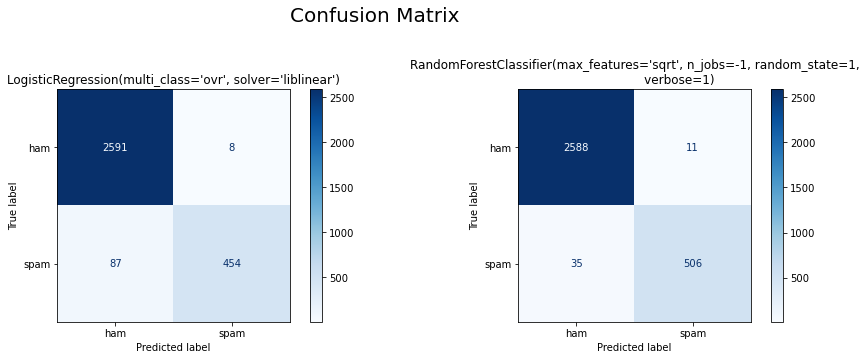

In [29]:
models = [model_LR, model_RFC]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

for model, ax in zip(models, axes.flatten()):
    plot_confusion_matrix(model, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues')
    ax.title.set_text(model[1])
fig.suptitle('Confusion Matrix\n', fontsize = 20)
plt.tight_layout()  
plt.show()

# **Graphical User Interface**

In [30]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from PIL import Image
import requests
from io import BytesIO
### CREATE VIRTUAL DISPLAY ###
#!apt-get install -y xvfb # X Virtual Frame Buffer Installation
import os

In [31]:
os.system('Xvfb :1 -screen 0 1600x1200x16  &')   # virtual display [1600x1200] 16 bit color (can be 8, 16, 24)
os.environ['DISPLAY']=':1.0'    # request X clients to use virtual DISPLAY :1.0.

In [37]:
# VERSION 3.0
import sys
try:
    # python 2.x
    from Tkinter import * #import Tkinter as tk
except ImportError:
    # python 3.x
    from tkinter import * #import tkinter as tk

# Pillow library (Images)
from PIL import Image, ImageTk

def on_resize(event):
  pass
    # resize BG_IMG(Label_SIZE) & update Label IMG
    #BG_.image = ImageTk.PhotoImage(BG_IMG.resize((event.width, event.height), Image.ANTIALIAS))
    #BG_.config(image=BG_.image)

# Define Function for get Value
def detection():
    get_user_sms = msg.get("1.0",'end-1c')
    
    LogisticRegression_Prediction = predict_SMS(get_user_sms, model_LR)
    RandomForest_Prediction = predict_SMS(get_user_sms, model_RFC)
    
    output = "This SMS acording with...\n\n"
    output += "Logistic Regression Model is: \t" + LogisticRegression_Prediction
    output += "\n\nRandom Forest Classifier Model is: " + RandomForest_Prediction

    myTKlabel['text'] = output
    print(get_user_sms)
    
root = Tk()
root.wm_title('            SMS SPAM DETECTION            ')

HEIGTH = 550#700
WIDTH = 400
BG_color = 'black'

root.geometry('{}x{}'.format(WIDTH, HEIGTH))
BG_ = Label(root, 
            bg=BG_color,
           )
BG_.place(x=0, y=0, relwidth=1, relheight=1) # make label l to fit the parent window always

# TITLE
title = Label(
    root,
    text='SMS SPAM DETECTION',
    relief=SUNKEN,
    fg='gold',
    bg=BG_color,
    font=("Helvetica", 14, 'underline'),
    borderwidth=0
    )
title.pack(pady = 25, ipadx=0, ipady=0)

# INPUT MSG
msg = Text(root, height = 5, width = 45)#, width=40)
msg.pack()
msg.insert('1.0', 'Enter SMS Here...')

# LABEL: OUTPUT AREA (SPAM | HAM)
myTKlabel = Label(root, text='?', fg='green', bg='white', font=("Helvetica", 12),
                  borderwidth=4, relief="raised", height=15, width=39, justify=LEFT
                  )
myTKlabel.pack(pady = 10, ipadx=0, ipady=0)

# BUTTON: DETECT CLASSIFY|DETECT SPAM
BTN_ = Button(root, height=1, width=30, text="CLASSIFY", command = detection, bg="green", fg="white",
            font=("Helvetica", 14)
             )
BTN_.pack()

root.mainloop()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


Your AIB online access is suspended due to unusual activity. To restore access please follow the steps via: https://securemobileaibapp.com
